<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Neural%20Network%20Regression%20with%20Tensorflow/neural_network_regression_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Neural Network

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Create Data to View and Fit

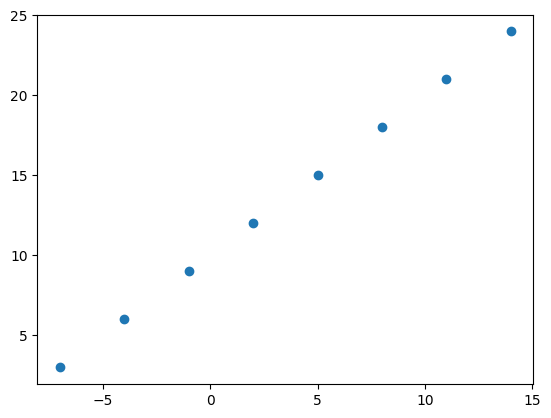

In [5]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [6]:
# create a demo tensor for our house prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_price = tf.cast(house_price, dtype=tf.float32)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In the above case input shape and output shape is coming blank because they are tensors of rank 0, that means it has no dimension or 0 dimension

In [8]:
X[0].ndim

0

One of the most common error in deep learning is input and output shape

## Turn Numpy Arrays To Tensors

In [12]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling the tensorflow
1. **Creating a model** - Define the input and output layers, as well as the hidden layers in the deep learning model
2. **Compiling a model** - Define the `loss function` (in other words, the function which tells us our model how wrong it is) and the `optimizer` ( tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - Letting the model try to find patterns between X & y(features and labels)

In [16]:
# Seta random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (BOTH works tf.expand_dims() function as well as X[..., newaxis])
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)
model.fit(X[..., tf.newaxis], y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 327ms/step - loss: 11.2804 - mae: 11.2804
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1479 - mae: 11.1479
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.0154 - mae: 11.0154
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 10.8828 - mae: 10.8828
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.7503 - mae: 10.7503


### Alternative way

In [17]:
tf.random.set_seed(42)

# Create thw model
model = tf.keras.Sequential([])

# Add a layer to the model
model.add(tf.keras.layers.Dense(1))

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# Fit the model
model.fit(X[..., tf.newaxis], y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 503ms/step - loss: 7.5000 - mae: 7.5000
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 7.4944 - mae: 7.4944
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 7.4887 - mae: 7.4887
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 7.4831 - mae: 7.4831
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 7.4775 - mae: 7.4775


In [18]:
# Predict the label from the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 164ms/step


array([[29.436102]], dtype=float32)

In [19]:
y_pred = model.predict(y)
y_pred

1/1 [==============================] - 0s 52ms/step


array([[ 5.225488],
       [10.413477],
       [15.601465],
       [20.789454],
       [25.977442],
       [31.16543 ],
       [36.353416],
       [41.541405]], dtype=float32)